In [52]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

Построим двумя способами доверительные интервалы для дисперсии нормального распределения, когда математиеское ожидание известно (будем считать, что оно равно нулю)

С помощью статистики $\sum{\frac{X_k^2}{n}}$ получаем интервал:
$$
(\frac{\sum{Xk^2}}{\lambda_{(1+\gamma)/2}}, {\frac{\sum{Xk^2}}{\lambda_{(1-\gamma)/2}}})
$$

где $\lambda_p$ - квантиль порядка $p$ распределения хи-квадрат с $n$ степенями свободы.

С помощью статистики $(\sum{\frac{X_{k}}{n}})^2$ получаем интервал:
$$
(\frac{n\overline X^2}{z^2_{(3+\gamma)/4}}, \frac{n\overline X^2}{z^2_{(3-\gamma)/4}})
$$

где $z_p$ - квантиль порядка $p$ стандартного нормального распределения.

In [85]:
def sample(var, n):
    return np.random.normal(scale=np.sqrt(var), size=n)

def conf_interval_chi(gamma, X):
    lambda_left = scipy.stats.chi2(X.shape[0]).ppf((1 + gamma) * 0.5)
    lambda_right = scipy.stats.chi2(X.shape[0]).ppf((1 - gamma) * 0.5)
    
    X_sqr = np.sum(X**2)
    return X_sqr / lambda_left, X_sqr / lambda_right


def conf_interval_norm(gamma, X):
    lambda_left = scipy.stats.norm().ppf((3 + gamma) / 4)
    lambda_right = scipy.stats.norm().ppf((3 - gamma) / 4)
    
    nX = X.shape[0] * np.mean(X)**2
    
    return nX / lambda_left**2, nX / lambda_right**2


def plot_intervals(sample_min, sample_max, estimator):
    lefts, rights = [], []
    plt.figure(figsize=(12, 8))
    N = np.arange(sample_min, sample_max, 100)
    for n in N:
        left, right = estimator(0.95, sample(10, n))

        lefts.append(left)
        rights.append(right)
        
    plt.plot(N, rights);
    plt.plot(N, lefts);

Можно сказать, что доверительный интервал на основании первой статистики и правда оценивает дисперсию нормального распределения. При увеличении количества наблюдений он становится уже. 

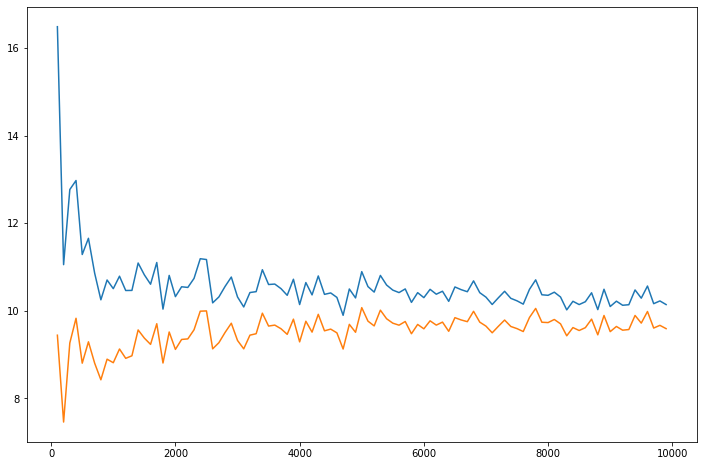

In [86]:
plot_intervals(100, 10000, conf_interval_chi)

Вторая статистика не оценивает дисперсию нормального распределения, поэтому доверительный интвервал при увеличении данных не сужается и покрывает истинный параметр.

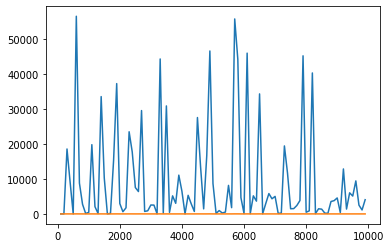

In [84]:
plot_intervals(100, 10000, conf_interval_norm)

Докажем, что вторая статистика несостоятельна.

$P(|\overline X^2 - \sigma^2| \geq \epsilon) \leq \frac{E|\overline X^2 - \sigma^2|}{\epsilon} = \frac{|E\overline X^2 - \sigma^2|}{\epsilon} = \frac{|\mu^2 + \frac{\sigma^2}{n} - \sigma^2|}{\epsilon} \xrightarrow{n\rightarrow\infty} \frac{|\mu^2 - \sigma^2|}{\epsilon} > 0$